In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sns.set_style("whitegrid")


In [3]:
df = pd.read_csv('IMDB Dataset.csv')

In [4]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [5]:
df['len_char_review'] = df['review'].apply(lambda x: len(x))

In [6]:
df['avg_len_sentence'] = df['review'].apply(lambda x:
                                            [len(sentence) for sentence in x.split('.')
                                             if len(sentence) != 0])\
                                    .apply(lambda x: sum(x) / len(x))

In [7]:
df

,review,sentiment,len_char_review,avg_len_sentence
0,One of the other reviewers has mentioned that ...,positive,1761,102.058824
1,A wonderful little production. <br /><br />The...,positive,998,165.333333
2,I thought this was a wonderful way to spend ti...,positive,926,153.333333
3,Basically there's a family where a little boy ...,negative,748,92.250000
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317,86.800000
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,1008,111.111111
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,642,127.400000
49997,I am a Catholic taught in parochial elementary...,negative,1280,114.818182
49998,I'm going to have to disagree with the previou...,negative,1234,153.250000


### Lower -> remove tags, punctuation and stopwords

In [8]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
import re

In [9]:
tokenizer = RegexpTokenizer(r"\w+")
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english')) 
html_pattern = re.compile('<.*?>')

df['review'] = df['review'].str.lower()
df['review'] = df.review.apply(lambda text: ' '.join([lemmatizer.lemmatize(html_pattern.sub('', w)) 
                                                      for w in tokenizer.tokenize(text) 
                                             if not w in stop_words]))

In [10]:
df['len_char_clean']= df['review'].apply(lambda x: len(x))

In [11]:
df.loc[0, 'review']

'one reviewer mentioned watching 1 oz episode hooked right exactly happened br br first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word br br called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda em city home many aryan muslim gangsta latino christian italian irish scuffle death stare dodgy dealing shady agreement never far away br br would say main appeal show due fact go show dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill prison expe

In [12]:
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})

In [13]:
def plot_count(df, col1, col2, group_col, title_1, title_2, subtitle):
    fig,(ax1,ax2)=plt.subplots(1,2,figsize=(25,10))
    sns.histplot(df, x=col1, hue=group_col, ax=ax1)
    ax1.set_title(title_1)
    sns.histplot(df, x=col2, hue=group_col, ax=ax2)
    ax2.set_title(title_2)
    fig.suptitle(subtitle)
    plt.show()  

In [14]:
df_pos = df[df['sentiment'] == 1]
df_neg = df[df['sentiment'] == 0]

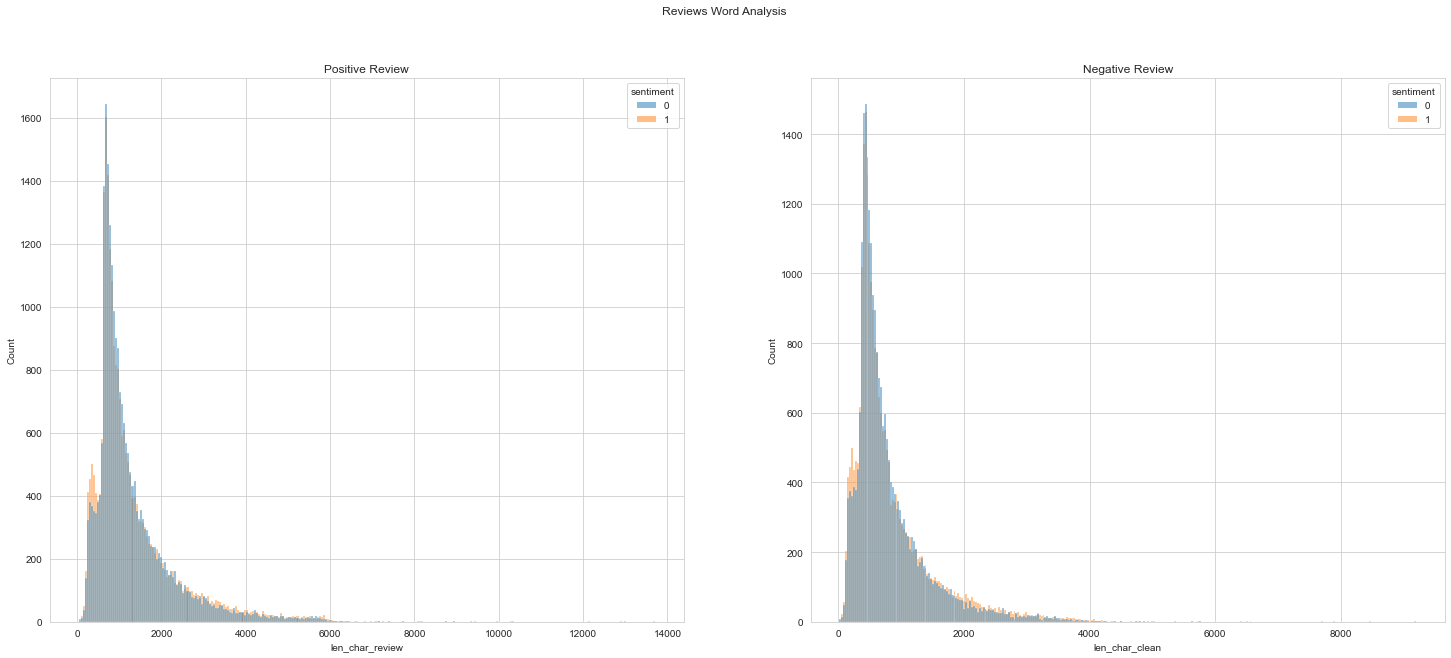

In [15]:
plot_count(df, 'len_char_review', 'len_char_clean', 'sentiment',
           "Positive Review","Negative Review","Reviews Word Analysis")

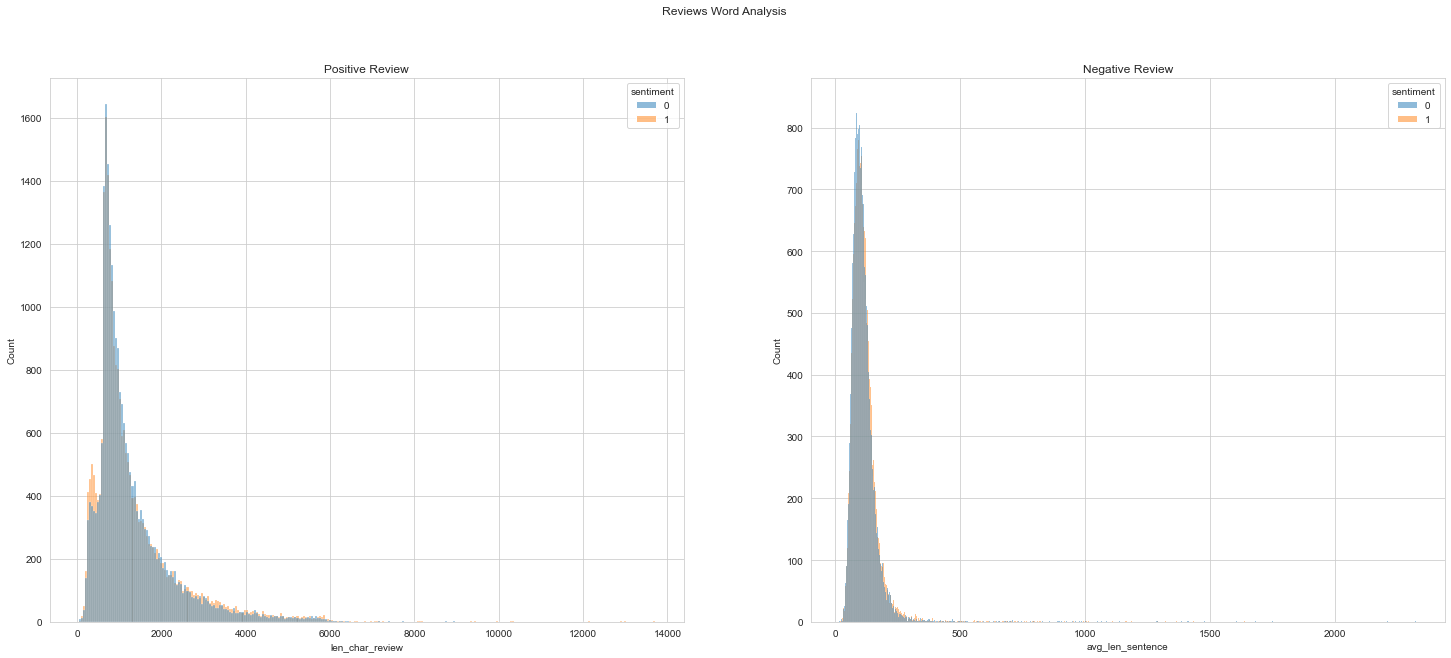

In [16]:
plot_count(df, 'len_char_review', 'avg_len_sentence', 'sentiment',
           "Positive Review","Negative Review","Reviews Word Analysis")

### Облака слов

In [17]:
!pip install wordcloud

In [18]:
from wordcloud import WordCloud

Облако слов для положительных коментариев

<function matplotlib.pyplot.show(close=None, block=None)>

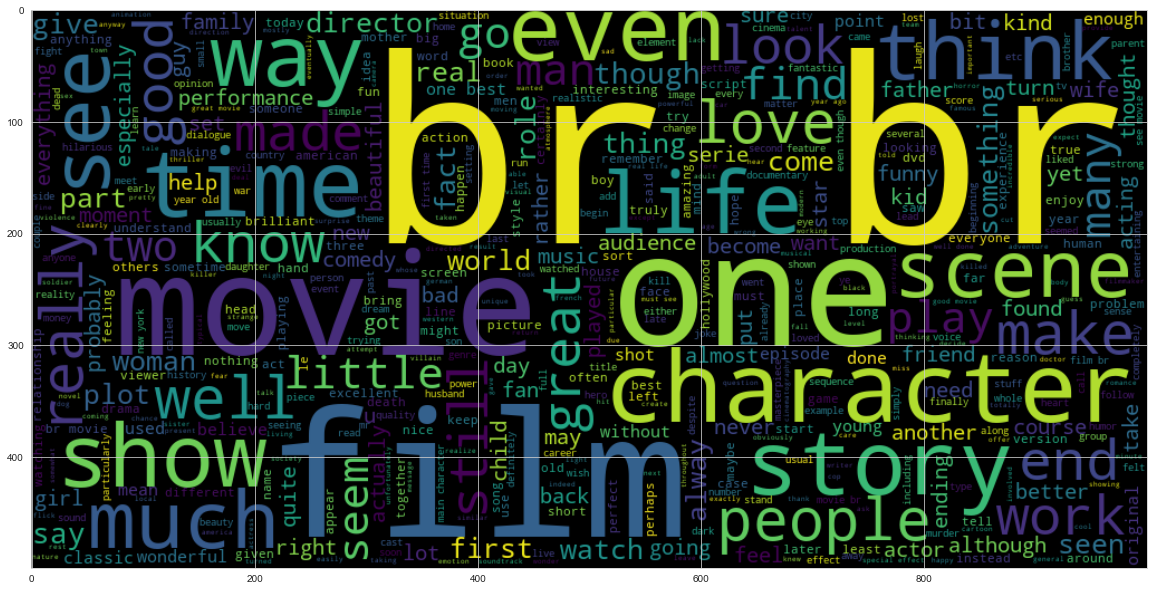

In [19]:
#word cloud for positive review words
plt.figure(figsize=(20,20))
positive_text = ' '.join(df_pos['review'].values)
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words, interpolation='bilinear')
plt.show

Облако слов для негативных коментариев

<function matplotlib.pyplot.show(close=None, block=None)>

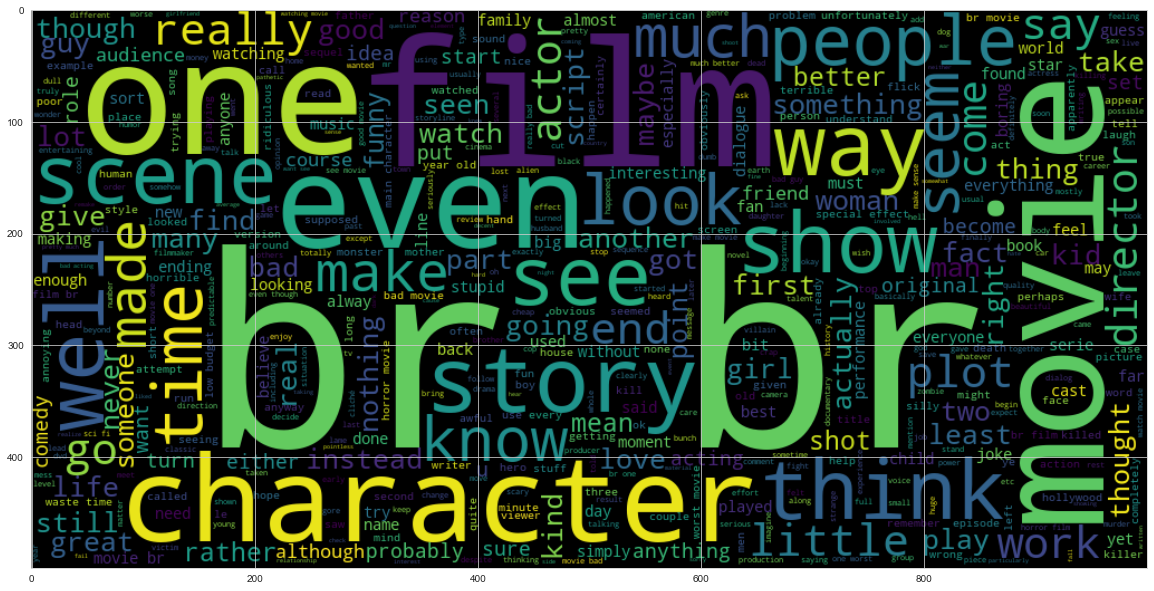

In [20]:
#word cloud for positive review words
plt.figure(figsize=(20,20))
positive_text = ' '.join(df_neg['review'].values)
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words, interpolation='bilinear')
plt.show

Другие способы визуализации

In [28]:
from sklearn.decomposition import PCA, TruncatedSVD,SparsePCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE

import matplotlib
import matplotlib.patches as mpatches

In [29]:
train_df = df[:int(len(df) * 0.8)]

In [40]:
cv=CountVectorizer()
fit_data_cv=cv.fit_transform(train_df.review.values)

tfidfv=TfidfVectorizer()
fit_data_tfidf=tfidfv.fit_transform(train_df.review.values)

In [41]:
tsvd = TruncatedSVD(n_components=2,algorithm="randomized",random_state=42)
tsne = TSNE(n_components=2,random_state=42) #not recommended instead use PCA
pca  = SparsePCA(n_components=2,random_state=42)

In [44]:
tsvd_data = tsvd.fit_transform(fit_data_cv)
train_df[['tsvd_1', 'tsvd_2']] = tsvd_data

/Users/vadimakhmetov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-46-d5611296a41e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[['tsvd_1', 'tsvd_2']] = tsvd_data
/Users/vadimakhmetov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

In [47]:
train_df

,review,sentiment,len_char_review,avg_len_sentence,len_char_clean,tsvd_1,tsvd_2
0,one reviewer mentioned watching 1 oz episode h...,1,1761,102.058824,1090,6.579902,1.900973
1,wonderful little production br br filming tech...,1,998,165.333333,659,6.076054,2.198918
2,thought wonderful way spend time hot summer we...,1,926,153.333333,579,4.488655,1.017769
3,basically family little boy jake think zombie ...,0,748,92.250000,448,6.936063,0.296079
4,petter mattei love time money visually stunnin...,1,1317,86.800000,864,9.880206,0.558759
...,...,...,...,...,...,...,...
39995,marvelously funny comedy great cast john ritte...,1,762,68.363636,466,5.678048,2.609561
39996,plot central character moving camera close ups...,1,1566,96.875000,978,7.412773,0.422471
39997,show awesome love actor great story line chara...,1,698,45.533333,430,1.794866,-1.764452
39998,fact movie entitled successful movie switzerla...,0,1407,127.000000,890,10.876058,1.972160


<AxesSubplot:xlabel='tsvd_1', ylabel='tsvd_2'>

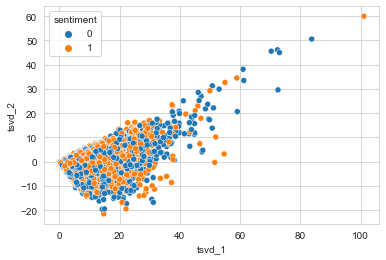

In [55]:
sns.scatterplot(data=train_df, x='tsvd_1', y='tsvd_2', hue='sentiment')

/Users/vadimakhmetov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-57-4957683a8fc3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[['pca_1', 'pca_2']] = tsvd_data
/Users/vadimakhmetov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

<AxesSubplot:xlabel='pca_1', ylabel='pca_2'>

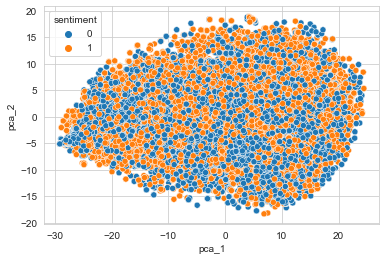

In [57]:
tsvd_data = tsne.fit_transform(fit_data_cv)
train_df[['pca_1', 'pca_2']] = tsvd_data
sns.scatterplot(data=train_df, x='pca_1', y='pca_2', hue='sentiment')

/Users/vadimakhmetov/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/vadimakhmetov/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/vadimakhmetov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:659: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[k] = np.nan
<ipython-input-58-a70a4c0a8433>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

<AxesSubplot:xlabel='tsne_1', ylabel='tsne_2'>

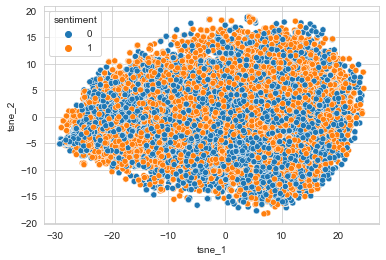

In [58]:
tsvd_data = tsne.fit_transform(fit_data_cv)
train_df[['tsne_1', 'tsne_2']] = tsvd_data
sns.scatterplot(data=train_df, x='tsne_1', y='tsne_2', hue='sentiment')